# Descripción de datos por medio de gráficas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.express as px

## Gráficas para datos categoricos

**Ejemplo 1.3**

<p style='text-align:justify;'>
En una encuesta respecto a la educación pública, a 400 administradores de escuelas se les pidió calificaran la calidad de la educación en Estados Unidos. Sus respuestas están resumidas en la tabla 1.1. Construya una gráfica de pastel y una de barras a partir de este conjunto de datos.
</p>

In [3]:
df = pd.DataFrame(
    np.array([
        ['A', 35], 
        ['B', 260], 
        ['C', 93], 
        ['D', 12]]
    ), 
    columns=['Calificación', 'Frecuencia']
)

df =df.set_index('Calificación')

In [4]:
df = df.reset_index()

In [5]:
df['Frecuencia'] = pd.to_numeric(df['Frecuencia'])

In [6]:
df['Porcentaje'] = (df['Frecuencia'] / df['Frecuencia'].sum()) * 100

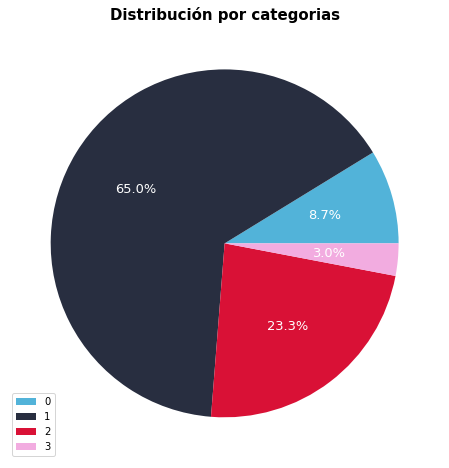

In [7]:
colores = ['#52B3D9', '#282E40', '#D91136', '#F2ACE0']

plt.figure(figsize=(8,8))

plt.pie(
    df['Frecuencia'],
    autopct='%1.1f%%', 
    colors=colores, 
    textprops={
        'color':'white', 
        'fontsize': 13
    })

plt.title(
    'Distribución por categorias', 
    fontdict={
        'color':'black',
        'fontweight': 'bold',
        'size': 15
    })

plt.legend(df.index, loc='lower left')

plt.show()

In [8]:
df

,Calificación,Frecuencia,Porcentaje
0,A,35,8.75
1,B,260,65.00
2,C,93,23.25
3,D,12,3.00


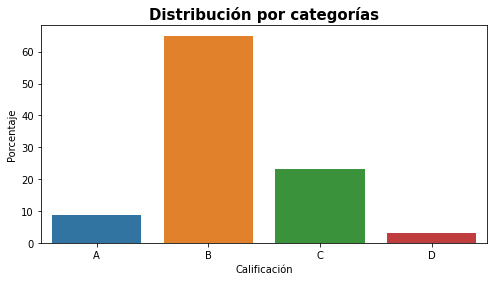

In [9]:
plt.figure(figsize=(8,4))
sns.barplot(x=df['Calificación'], y=df['Porcentaje'])
plt.title(
    'Distribución por categorías',
    fontdict={
        'color':'black',
        'fontsize': 15,
        'fontweight': 'bold'
    }
)
plt.show()

**Ejemplo 1.4**

<p style='text-align: justify;'>
Una bolsa de tamaño botana de dulces de cacahuate M&M’S contiene 21 dulces con los colores que se indican en la tabla 1.3. La variable “color” es cualitativa, por lo que la tabla 1.4 pone en lista las seis categorías junto con un total del número de dulces de cada color. Las últimas tres columnas de la tabla 1.4 dan las tres diferentes medidas de con qué frecuencia se presenta cada categoría. Como las categorías son colores y no tienen un orden particular, se pueden construir gráficas de barras con muchas formas diferentes con sólo reordenar las barras. Para enfatizar que el café es el color más frecuente, seguido por el azul, verde y anaranjado, ordenamos las barras de mayor a menor y generamos la gráfica de barras usando el MINITAB en la figura 1.5. Una gráfica de barras en la que las barras están ordenadas de mayor a menor se denomina gráfica de Pareto
</p>

In [10]:
lista = ['Café', 'Rojo', 'Amarillo', 'Café', 'Anaranjado', 'Amarillo', 'Verde', 'Rojo', 'Anaranjado', 'Azul', 'Azul', 'Café', 
         'Verde', 'Verde', 'Azul', 'Café', 'Azul', 'Café', 'Azul', 'Café', 'Anaranjado' ]


In [11]:
df = pd.DataFrame(lista, columns=['Colors'])
df['Frecuencia'] = 1

In [12]:
df = df.groupby('Colors').sum()

In [13]:
df['Frecuencia Relativa'] = (df['Frecuencia'] / df['Frecuencia'].sum())
df['Porcentaje'] = (df['Frecuencia Relativa'] * 100)

In [14]:
df = df.reset_index()
df.loc['Total'] = df.sum()
df.iloc[6,0] = ''

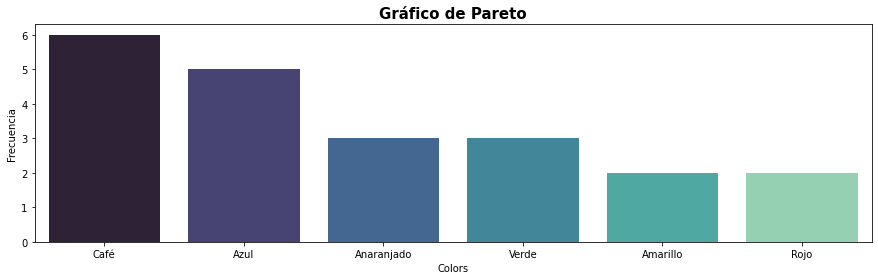

In [15]:
plt.figure(figsize=(15,4))
plt.title(
    'Gráfico de Pareto',
    fontdict={
        'fontweight':'bold',
        'fontsize': 15
    }
)
sns.barplot(
    data=df.iloc[:6].sort_values('Frecuencia', ascending=False), 
    x='Colors', 
    y='Frecuencia', 
    palette='mako',
#     color='b',
)
plt.show()

**Ejercicios 1.3**

**Ejercicio 1.10**

<p style='text-align:justify'>
Cincuenta personas se agrupan en cuatro categorías, A, B, C y D, y el número de personas que caen en cada categoría se muestra en la tabla:
</p>

In [16]:
df = pd.DataFrame([['A', 11], ['B', 14], ['C', 20], ['D', 5]])
df.columns=['Categoria', 'Frecuencia']
df = df.set_index('Categoria')

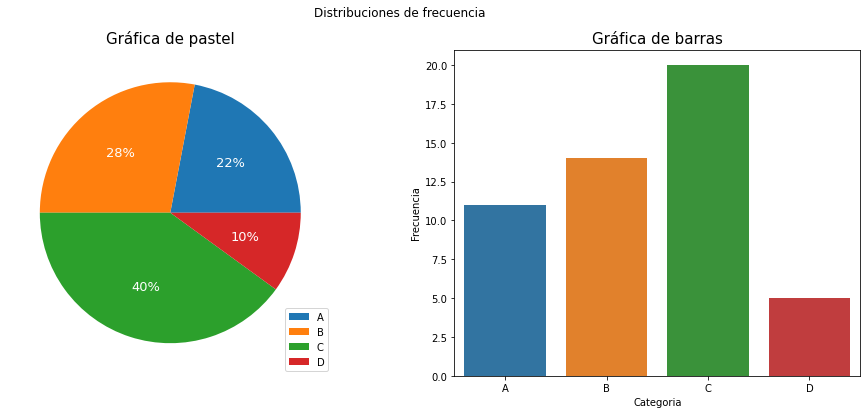

In [19]:
fig, ax = plt.subplots(1,2, figsize=(16,6))

fig.suptitle('Distribuciones de frecuencia')

ax[0].set_title('Gráfica de pastel', fontdict={'fontsize':15})
ax[0].pie(df['Frecuencia'], autopct='%1.0f%%', textprops={'color':'white', 'fontsize':13})
ax[0].legend(df.index)

ax[1].set_title('Gráfica de barras', fontdict={'fontsize':15})
sns.barplot(ax=ax[1], data=df, x= df.index, y='Frecuencia')

plt.show()

**Ejercicio 1.11 Jeans**

<p style='text-align:justify'>
Un fabricante de jeans (pantalones vaqueros) tiene plantas en California, Arizona y Texas. Un grupo de 25 pares de jeans se selecciona al azar de entre la base de datos computarizada, registrándose el estado en el que se produce:
</p>

In [20]:
jeans = ['CA', 'CA', 'AZ', 'CA', 'CA', 'AZ', 'CA', 'AZ', 'AZ', 'AZ', 'AZ', 'TX', 'CA', 'TX', 'AZ', 'TX', 'TX', 'AZ', 'TX', 'CA', 'CA', 'TX', 'TX', 'TX', 'CA']

In [21]:
jeans = pd.DataFrame(jeans)
jeans.columns=['Plantas']
jeans['Frecuencia'] = 1

In [22]:
df = jeans.groupby('Plantas').count()

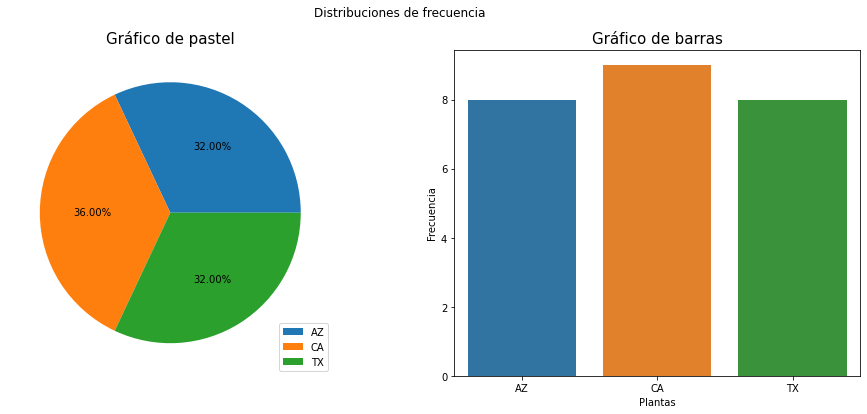

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribuciones de frecuencia')

ax[0].set_title('Gráfico de pastel', fontdict={'fontsize':15})
ax[0].pie(df['Frecuencia'], autopct='%1.2f%%', textprops={'color': 'black'})
ax[0].legend(df.index, loc='lower right')

ax[1].set_title('Gráfico de barras', fontdict={'fontsize':15})
sns.barplot(ax=ax[1], data=df, x=df.index, y='Frecuencia')

plt.show()

**Ejercicio 1.14 Distribuciones de carrera en las fuerzas armadas** 

<p style='text-align: justify'>
Las cuatro ramas de las fuerzas armadas en Estados Unidos son muy diferentes en su formación con respecto a las distribuciones de género, raza y edad. La tabla siguiente muestra el desglose racial de
los miembros del Ejército y la Fuerza Aérea de Estados Unidos.
</p>  

In [25]:
df = pd.DataFrame([['Blanco', 58.4, 75.5], ['Negro', 26.3, 16.2], ['Latino', 8.9, 5], ['Otro', 6.4, 3.3]])
df.columns=['Raza', 'Ejercito', 'Fuerza Aérea']
df = df.set_index('Raza')

In [26]:
df

,Ejercito,Fuerza Aérea
Raza,,
Blanco,58.4,75.5
Negro,26.3,16.2
Latino,8.9,5.0
Otro,6.4,3.3


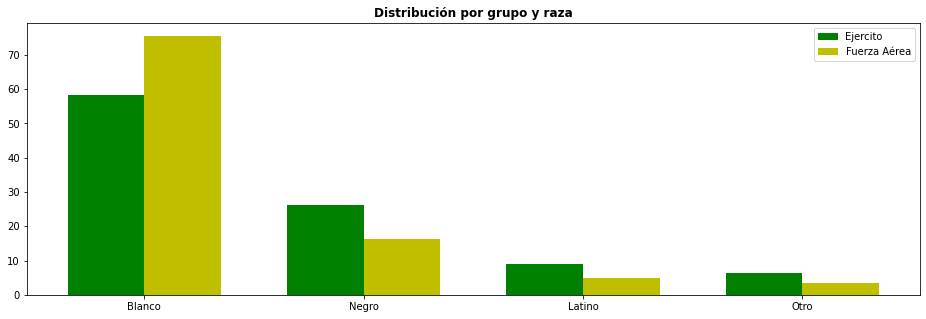

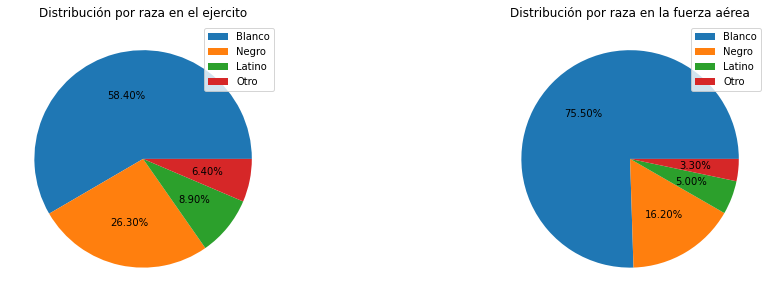

In [146]:
# Primer gráfico individual 

x = np.arange(len(list(df.index)))

fig, ax = plt.subplots(figsize=(16, 5))
rects1 = ax.bar(x-width/2, df['Ejercito'], width, label='Ejercito', color='g')
rects1 = ax.bar(x+width/2, df['Fuerza Aérea'], width, label='Fuerza Aérea', color='y')

ax.set_xticks(x)
ax.set_xticklabels(df.index)

ax.legend()

ax.set_title('Distribución por grupo y raza', fontdict={'fontweight':'bold'})

plt.show()

# Gráficos grupales

fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].set_title('Distribución por raza en el ejercito')
ax[0].pie(df['Ejercito'], autopct='%1.2f%%')
ax[0].legend(df.index, loc='upper right')

ax[1].set_title('Distribución por raza en la fuerza aérea')
ax[1].pie(df['Fuerza Aérea'], autopct='%1.2f%%')
ax[1].legend(df.index, loc='upper right')

plt.show()

## Gráficas para datos cuantitativos

**Ejemplo 1.5**

<p style='text-align: justify'>
La cantidad de dinero gastada en el año fiscal 2005, por el Departamento de Defensa de Estados Unidos en varias categorías, se muestra en la tabla 1.5 Construya una gráfica de pastel y una gráfica de barras para describir los datos. Compare las dos formas de presentación.
</p>

In [152]:
df = pd.DataFrame([
    ['Personal militar', 127.5], 
    ['Operaciones y mantenimiento', 188.1],
    ['Adquisiciones', 82.3],
    ['Investigación y desarrollo', 65.7],
    ['Construcción militar', 5.3],
    ['Otros', 5.5]
])

df.columns = ['Categoría', 'Cantidad']
df = df.set_index('Categoría')

In [155]:
df

,Cantidad
Categoría,
Personal militar,127.5
Operaciones y mantenimiento,188.1
Adquisiciones,82.3
Investigación y desarrollo,65.7
Construcción militar,5.3
Otros,5.5


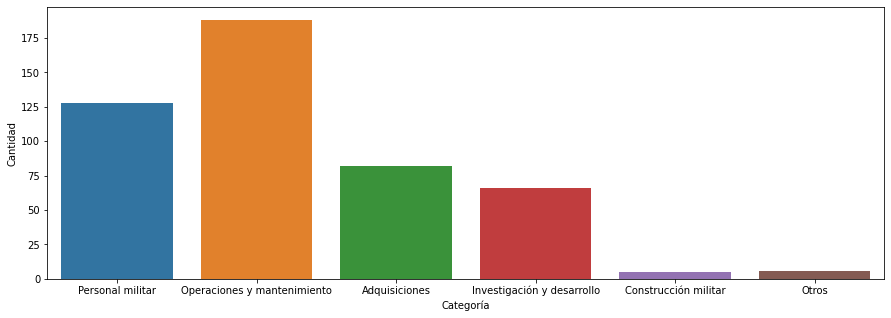

In [175]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data=df, x=df.index, y='Cantidad')
plt.show()

**Ejemplo 1.6**

<p style='text-align: justify'>
En el año 2025, el mayor de los “hijos de la explosión demográfica” (nacido en 1946) tendrá 79 años, y el mayor de los de la “Generación X” (nacido en 1965) estará a dos años de ser elegible para el Seguro Social. ¿Cómo afectará esto a las tendencias del consumidor en los siguientes 15 años? ¿Habrá suficientes fondos para los “hijos de la explosión demográfica” para recolectar prestaciones del Seguro Social? La Oficina de Censos de Estados Unidos da proyecciones para la parte de la población norteamericana que tendrá 85 años y más en los próximos años, como se muestra a continuación. Construya una gráfica de líneas para ilustrar los datos. ¿Cuál es el efecto de prolongar y contraer el eje vertical de la gráfica de línea?</p>

In [254]:
df = pd.DataFrame([[2010, 6.1], [2020, 7.3], [2030, 9.6], [2040, 15.4], [2050, 20.9]])
df.columns=['Año', 'Habitantes']
# df = df.set_index('Año')

In [255]:
df

,Año,Habitantes
0,2010,6.1
1,2020,7.3
2,2030,9.6
3,2040,15.4
4,2050,20.9


In [265]:
fig = px.line(df, x='Año', y='Habitantes')
fig.show()